<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Expectation-and-Variance" data-toc-modified-id="Expectation-and-Variance-1">Expectation and Variance</a></span><ul class="toc-item"><li><span><a href="#Expectation" data-toc-modified-id="Expectation-1.1">Expectation</a></span><ul class="toc-item"><li><span><a href="#Linearity-of-Expectation" data-toc-modified-id="Linearity-of-Expectation-1.1.1">Linearity of Expectation</a></span></li></ul></li><li><span><a href="#Variance" data-toc-modified-id="Variance-1.2">Variance</a></span><ul class="toc-item"><li><span><a href="#Covariance" data-toc-modified-id="Covariance-1.2.1">Covariance</a></span></li></ul></li><li><span><a href="#Bernoulli-Random-Variables" data-toc-modified-id="Bernoulli-Random-Variables-1.3">Bernoulli Random Variables</a></span><li><span><a href="#Sample-Means" data-toc-modified-id="Sample-Means-1.4">Sample Means</a></span></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2">Summary</a></span></li></ul></div>

In [1]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi
from scipy import stats

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

## Expectation and Variance

Although a random variable is completely described by its probability mass function (PMF), we often use **expectation** and **variance** to describe the variable's long-run average and spread. These two values have unique mathematical properties that hold particular importance for data science—for example, we can show that an estimation is accurate in the long term by showing that its expected value is equal to the population parameter. We proceed by defining expectation and variance, introducing their most useful mathematical properties, and conclude with a brief application to estimation.

### Expectation

We are often interested in the long-run average of a random variable because it gives us a sense of the center of the variable's distribution. We call this long-run average the **expected value**, or **expectation** of a random variable. The expected value of a random variable $ X $ is defined as:

$$\mathbb{E}[X] = \sum_{x\in \mathbb{X}} x \cdot \mathbb{P}(X = x)$$

For example, if $ X $ represents the roll of a single fair six-sided die, 

$$
\begin{aligned}
\mathbb{E}[X]
&= 1 \cdot \mathbb{P}(X = 1) + 2 \cdot \mathbb{P}(X = 2) + \ldots + 6 \cdot \mathbb{P}(X = 6) \\
&= 1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + \ldots + 6 \cdot \frac{1}{6} \\
&= 3.5
\end{aligned}
$$

Notice that the expected value of $ X $ does not have to be a possible value of $ X $; although in this case  $ \mathbb{E}[X] = 3.5 $, $ X $ never takes on the value $ 3.5 $.

**Example:** Recall our dataset from the previous section:

In [2]:
# HIDDEN
data={"Name":["Carol","Bob","John","Dave"], 'Age': [50,52,51,50]}
people = pd.DataFrame(data)
people

,Age,Name
0,50,Carol
1,52,Bob
2,51,John
3,50,Dave


We pick one person from this dataset uniformly at random. Let $ Y $ be a random variable representing the age of this person. Then:

$$
\begin{aligned}
\mathbb{E}[Y]
&= 50 \cdot \mathbb{P}(Y = 50) + 51 \cdot \mathbb{P}(Y = 51) + 52 \cdot \mathbb{P}(Y = 52) \\
&= 50 \cdot \frac{2}{4} + 51 \cdot \frac{1}{4} + 52 \cdot \frac{1}{4} \\
&= 50.75
\end{aligned}
$$

**Example:** Suppose we sample two people from the dataset with replacement. If the random variable $ Z $ represents the difference between the ages of the first and second persons in the sample, what is  $ \mathbb{E}[Z] $?


As in the previous section, we define $X$ as the age of the first person and $Y$ as the age of the second such that $Z = X - Y$. From the joint distribution of $X$ and $Y$ given in the previous section, we can find the PMF for $ Z $. For example, $ P(Z = 1) = P(X = 51, Y = 50) + P(X = 52, Y = 51) = \frac{3}{16} $. Thus,

$$
\begin{aligned}
\mathbb{E}[Z]
&= (-2) \cdot P(Z = -2) + (-1) \cdot P(Z = -1) + \ldots + (2) \cdot P(Z = 2) \\
&= (-2) \cdot \frac{2}{16} + (-1) \cdot \frac{3}{16}+ \ldots + (2) \cdot \frac{2}{16} \\
&= 0
\end{aligned}
$$

Since $ \mathbb{E}[Z] = 0 $, we expect that in the long run the difference between the ages of the people in a sample of size 2 will be 0.

#### Linearity of Expectation

When working with linear combinations of random variables as we did above, we can often make good use of the **linearity of expectation** instead of tediously calculating each joint probability individually.

The linearity of expectation states that:

$$
\begin{aligned}
\mathbb{E}[X + Y] &= \mathbb{E}[X] + \mathbb{E}[Y] \\
\end{aligned}
$$

From this statement we may also derive:

$$
\begin{aligned}
\mathbb{E}[cX] &= c\mathbb{E}[X] \\
\end{aligned}
$$

where $X$ and $Y$ are random variables, and $c$ is a constant.

In words, the expectation of a sum of any two random variables is equal to the sum of the expectations of the variables.

In the previous example, we saw that $ Z = X - Y $. Thus,  $ \mathbb{E}[Z] = \mathbb{E}[X - Y] = \mathbb{E}[X] - \mathbb{E}[Y] $. 

Now we can calculate $ \mathbb{E}[X] $ and  $ \mathbb{E}[Y] $ separately from each other. Since $ \mathbb{E}[X] = \mathbb{E}[Y] = 50.75 $, $ \mathbb{E}[Z] = 50.75 - 50.75 = 0 $.

The linearity of expectation holds even if $ X $ and $ Y $ are dependent on each other! As an example, let us again consider the case in which we sample two people from the dataset in the previous section but without replacement. As before, we define $X$ as the age of the first person and $Y$ as the age of the second, and $Z = X - Y$ where $X$ and $Y$ are not independent. 

From the joint distribution of $X$ and $Y$ given in the previous section, we can find $\mathbb{E}[Z]$:

$$
\begin{aligned}
\mathbb{E}[Z]
&= (-2) \cdot P(Z = -2) + (-1) \cdot P(Z = -1) + \ldots + (2) \cdot P(Z = 2) \\
&= (-2) \cdot \frac{2}{12} + (-1) \cdot \frac{3}{12}+ \ldots + (2) \cdot \frac{2}{12} \\
&= 0
\end{aligned}
$$

A simpler way to compute this expectation is to use the linearity of expectation. Even though $X$ and $Y$ dependent, $\mathbb{E}[Z] = \mathbb{E}[X - Y] = \mathbb{E}[X] - \mathbb{E}[Y]$. Recall from the previous section that $X$ and $Y$ have the same PMF even though we are sampling without replacement, which means that $\mathbb{E}[X] = \mathbb{E}[Y] = 50.75$. Hence as in the first scenario, $\mathbb{E}[Z] = 0$.

Note that the linearity of expectation only holds for linear combinations of random variables. For example, $ \mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y] $ is not a linear combination of $ X $ and $ Y $. In this case, $ \mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y] $ is true in general only for independent random variables.

### Variance

The variance of a random variable is a numerical description of the spread of a random variable. For a random variable $ X $:

$$
\begin{aligned}
Var(X) &= \mathbb{E}[(X - \mathbb{E}[X])^2] \\
\end{aligned}
$$

The above formula states that the variance of $ X $ is the average squared distance from $ X $'s expected value.

With some algebraic manipulation that we omit for brevity, we may also equivalently write:

$$
\begin{aligned}
Var(X) &= \mathbb{E}[X^2] - \mathbb{E}[X]^2 \\
\end{aligned}
$$

Consider the following two random variables $ X $ and $ Y $ with the following probability distributions:

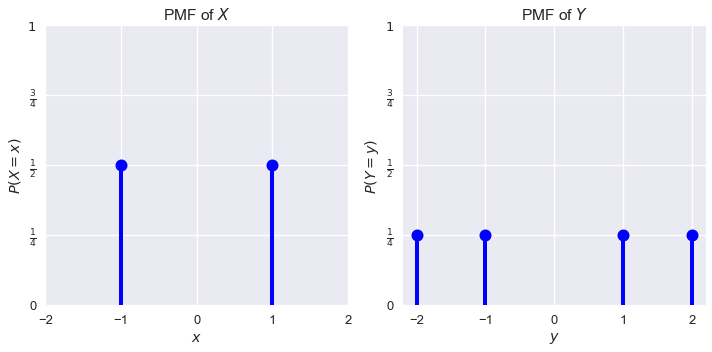

In [3]:
# HIDDEN
plt.figure(figsize=(10,5))
xk = (-1, 1)
pk = (1/2, 1/2)
x = stats.rv_discrete(name='x', values=(xk, pk))
ax = plt.subplot(1, 2, 1)
ax.plot(xk, x.pmf(xk), 'ro', ms=12, mec='b', color='b')
ax.vlines(xk, 0, x.pmf(xk), colors='b', lw=4)
plt.xlabel('$x$')
plt.ylabel('$P(X = x)$')
plt.xticks(np.arange(-2, 3))
plt.yticks(np.arange(0, 1.1, 0.25),
           (0, r'$\frac{1}{4}$', r'$\frac{1}{2}$', r'$\frac{3}{4}$', r'$1$'))
plt.ylim(0, 1)
plt.title('PMF of $X$')

xk = (-2, -1, 1, 2)
pk = (1/4, 1/4, 1/4, 1/4)
y = stats.rv_discrete(name='y', values=(xk, pk))
ax = plt.subplot(1, 2, 2)
ax.plot(xk, y.pmf(xk), 'ro', ms=12, mec='b', color='b')
ax.vlines(xk, 0, y.pmf(xk), colors='b', lw=4)
plt.xlabel('$y$')
plt.xticks(np.arange(-2, 3))
plt.ylabel('$P(Y = y)$')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.25),
           (0, r'$\frac{1}{4}$', r'$\frac{1}{2}$', r'$\frac{3}{4}$', r'$1$'))
plt.title('PMF of $Y$')
plt.tight_layout();

$ X $ takes on values -1 and 1 with probability $ \frac{1}{2} $ each. $ Y $ takes on values -2, -1, 1, and 2 with probability $ \frac{1}{4} $ each. We find that $ \mathbb{E}[X] = \mathbb{E}[Y] = 0 $. Since $ Y $'s distribution has a higher spread than $ X $'s, we expect that $ Var(Y) $ is larger than $ Var(X) $.

$$
\begin{aligned}
Var(X)
&= \mathbb{E}[X^2] - \mathbb{E}[X]^2 \\
&= \mathbb{E}[X^2] - 0^2 \\
&= \mathbb{E}[X^2] \\
&= (-1)^2 P(X = -1) + (1)^2 P(X = 1) \\
&= 1 \cdot 0.5 + 1 \cdot 0.5 \\
&= 1 \\\\
Var(Y)
&= \mathbb{E}[Y^2] - \mathbb{E}[Y]^2 \\
&= \mathbb{E}[Y^2] - 0^2 \\
&= \mathbb{E}[Y^2] \\
&= (-2)^2 P(Y = -2) + (-1)^2 P(Y = -1) + (1)^2 P(Y = 1) + (2)^2 P(Y = 2) \\
&= 4 \cdot 0.25 + 1 \cdot 0.25 + 1 \cdot 0.25 + 4 \cdot 0.25\\
&= 2.5
\end{aligned}
$$

As expected, the variance of $ Y $ is greater than the variance of $ X $.

The variance has a useful property to simplify some calculations. If $ X $ is a random variable:

$$
\begin{aligned}
Var(aX + b) &= a^2 Var(X)
\end{aligned}
$$

If two random variables $ X $ and $ Y $ are independent:

$$
\begin{aligned}
Var(X + Y) = Var(X) + Var(Y)
\end{aligned}
$$

Note that the linearity of expectation holds for any $ X $ and $ Y $ even if they are dependent; $ Var(X + Y) = Var(X) + Var(Y) $ holds only when $ X $ and $ Y $ are independent.

#### Covariance

The covariance of two random variables $X$ and $Y$ is defined as:

$$
\begin{aligned}
Cov(X, Y) &= \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]
\end{aligned}
$$

Again, we can perform some algebraic manipulation to obtain:

$$
\begin{aligned}
Cov(X, Y) = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]
\end{aligned}
$$

Note that although the variance of a single random variable must be non-negative, the covariance of two random variables can be negative. In fact, the covariance helps measure the correlation between two random variables; the sign of the covariance helps us determine whether two random variables are positively or negatively correlated. If two random variables $X$ and $Y$ are independent, then $Cov(X, Y) = 0$, and $\mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y]$.

### Bernoulli Random Variables

Suppose we want to use a random variable $X$ to a simulate a biased coin with $P(Heads) = p$. We can say that $X = 1$ if the coin flip is heads, and $X = 0$ if the coin flip is tails. Therefore, $P(X = 1) = p$, and $P(X = 0) = 1 - p$. This type of binary random variable is called a Bernoulli random variable; we can calculate its expected value and variance as follows:

$$\mathbb{E}[X] = 1 \times p + 0 \times (1 - p) = p$$

$$Var(X) = \mathbb{E}[X^2] - \mathbb{E}[X]^2 = 1^2 \times p + 0^2 \times (1 - p) - p^2 = p - p^2 = p(1 - p)$$

### Sample Means

Suppose we flip a coin with $P(Heads) = p$ a total of $n$ times and find the proportion of heads. Let us call this proportion $\hat{p}$. If we wanted to estimate $P(Heads)$, we might intuitively believe that $\hat{p}$ is a good guess. Now, we can use our newly gained knowledge of random variables, expectation, and variance to confirm this intuition.

Note that $\hat{p}$ itself is a random variable; thus, it must have some underlying distribution. If we let $X_i$ be a Bernoulli random variable for the $i^{th}$ coin flip (note that the $X_i$'s are independent since they represent independent coin flips), then we can mathematically determine that $\hat{p} = \frac{1}{n} \sum_{i=1}^{n} X_i$. We can then calculate the expected value, variance, and standard deviation of $\hat{p}$ as follows:

$$\mathbb{E}[\frac{1}{n} \sum_{i=1}^{n} X_i] = \frac{1}{n} \sum_{i=1}^{n}\mathbb{E}[X_i] = \frac{1}{n} \times np = p$$

$$Var(\frac{1}{n} \sum_{i=1}^{n} X_i) = \frac{1}{n^2} \sum_{i=1}^{n}Var(X_i) = \frac{1}{n^2} \times np(1-p) = \frac{p(1-p)}{n}$$

The expected value of $\hat{p}$, the sample proportion, is the same as $p$, the true proportion! Furthermore, the variance of the sample proportion gives us a measure of how much error we should expect if we use $\hat{p}$ to estimate $p$. As we increase the sample size $n$, the variance of our estimator decreases by a factor of $\frac{1}{n}$, and $\hat{p}$ converges to $p$. This fact is known as the law of large numbers.

Since this sample proportion converges to the true proportion as the sample size becomes large, the sample proportion is considered an *unbiased estimator* for the true proportion. Some estimators are biased—the sample maximum, for example, meaning that the expected value for these estimators is not the true value.

## Summary

Expectation and variance are simple descriptions of a random variable's center and spread. We use the versatility of random variables to describe data generation and modeling.